# **Machine Learning - Lab-Project**

---

##### Lab-Project of **Group 5**.

**Members:**
- Ammar Darwich <br>
- Raghad Shakhashiro <br>
- Lukas Jeckle <br>
- Luke Weiss <br>
- Valentin Talmon-l´Armèe <br>

---

## **Prediction of successful Startups**


#### In this Lab-Project we want to take a look at the [Startup-Investments-Crunchbase](https://www.kaggle.com/datasets/arindam235/startup-investments-crunchbase) Dataset to train a machine learning model for predicting success probabilities for startups.

---

## **1. Imports and Random**

---

#### 1.1 Adding the neccessary imports:

In [14]:
# =======================================================================================================
# Project Imports:
# =======================================================================================================

import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, make_scorer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, OneHotEncoder
from scipy.stats import randint, uniform
from sklearn.utils import resample

# =======================================================================================================
# Additional naive bayes imports:
# =======================================================================================================
import sklearn.naive_bayes as nb

# =======================================================================================================
# Additional ANN specific imports:
# =======================================================================================================
import torch
from torch import nn, optim
from skorch import NeuralNet

# =======================================================================================================
# Additional DecisionTree specific imports:
# =======================================================================================================
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree


#### 1.2 Definition of random seed:

In [59]:
# =======================================================================================================
# Defining and setting the random seed:
# =======================================================================================================

RSEED = np.random.seed(42)


#### 1.3 Adjusting global import settings:

In [16]:
# =======================================================================================================
# Adjusting global settings:
# =======================================================================================================

pd.set_option('display.max_columns', None)


## **2. Data Visualization & Preperation**

---

#### 2.1 Importing the data into a dataframe:

In [60]:
# =======================================================================================================
# Importing the data and visualizing the first few samples:
# =======================================================================================================

df = pd.read_csv('data/investments_VC.csv', encoding='latin1')
df.head()


,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,last_funding_at,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,"17,50,000",acquired,USA,NY,New York City,New York,1.0,2012-06-01,2012-06,2012-Q2,2012.0,2012-06-30,2012-06-30,1750000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,/organization/tv-communications,&TV Communications,http://enjoyandtv.com,|Games|,Games,"40,00,000",operating,USA,CA,Los Angeles,Los Angeles,2.0,NaN,NaN,NaN,NaN,2010-06-04,2010-09-23,0.0,4000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,"40,000",operating,EST,NaN,Tallinn,Tallinn,1.0,2012-10-26,2012-10,2012-Q4,2012.0,2012-08-09,2012-08-09,40000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,"15,00,000",operating,GBR,NaN,London,London,1.0,2011-04-01,2011-04,2011-Q2,2011.0,2011-04-01,2011-04-01,1500000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,/organization/r-ranch-and-mine,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,"60,000",operating,USA,TX,Dallas,Fort Worth,2.0,2014-01-01,2014-01,2014-Q1,2014.0,2014-08-17,2014-09-26,0.0,0.0,60000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### 2.2 Cleaning the data:

In [61]:
# =======================================================================================================
# Dropping unnecessary columns:
# =======================================================================================================

df.drop(['permalink', 'category_list', 'homepage_url', 'country_code', 'state_code', 'city', 'founded_at', 'founded_month', 'founded_quarter', 'founded_year', 'first_funding_at', 'last_funding_at', 'round_A', 'round_B', 'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H'], axis=1, inplace=True)
df.head()


,name,market,funding_total_usd,status,region,funding_rounds,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding
0,#waywire,News,"17,50,000",acquired,New York City,1.0,1750000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,&TV Communications,Games,"40,00,000",operating,Los Angeles,2.0,0.0,4000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,'Rock' Your Paper,Publishing,"40,000",operating,Tallinn,1.0,40000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,(In)Touch Network,Electronics,"15,00,000",operating,London,1.0,1500000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-R- Ranch and Mine,Tourism,"60,000",operating,Dallas,2.0,0.0,0.0,60000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
# =======================================================================================================
# Getting information of the data:
# =======================================================================================================

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54294 entries, 0 to 54293
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  49437 non-null  object 
 1    market               45470 non-null  object 
 2    funding_total_usd    49438 non-null  object 
 3   status                48124 non-null  object 
 4   region                44165 non-null  object 
 5   funding_rounds        49438 non-null  float64
 6   seed                  49438 non-null  float64
 7   venture               49438 non-null  float64
 8   equity_crowdfunding   49438 non-null  float64
 9   undisclosed           49438 non-null  float64
 10  convertible_note      49438 non-null  float64
 11  debt_financing        49438 non-null  float64
 12  angel                 49438 non-null  float64
 13  grant                 49438 non-null  float64
 14  private_equity        49438 non-null  float64
 15  post_ipo_equity    

In [63]:
# =======================================================================================================
# Ordinal Encode columns of type 'object':
# =======================================================================================================

encoder = OrdinalEncoder()

columns_to_encode = df.select_dtypes(include=['object']).columns
for column in columns_to_encode:
    feature = pd.DataFrame(df[column])
    df[column] = encoder.fit_transform(feature)

df.head()


,name,market,funding_total_usd,status,region,funding_rounds,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding
0,0.0,465.0,3978.0,0.0,699.0,1.0,1750000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,277.0,9441.0,2.0,570.0,2.0,0.0,4000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,543.0,9446.0,2.0,956.0,1.0,40000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,211.0,3482.0,2.0,568.0,1.0,1500000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.0,683.0,11816.0,2.0,251.0,2.0,0.0,0.0,60000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
# =======================================================================================================
# Cleaning null values:
# =======================================================================================================

print('Before cleaning:')
print(np.isnan(df).sum())
print()

df = df.fillna(0)

print('After cleaning:')
print(np.isnan(df).sum())
print()


Before cleaning:
name                     4857
 market                  8824
 funding_total_usd       4856
status                   6170
region                  10129
funding_rounds           4856
seed                     4856
venture                  4856
equity_crowdfunding      4856
undisclosed              4856
convertible_note         4856
debt_financing           4856
angel                    4856
grant                    4856
private_equity           4856
post_ipo_equity          4856
post_ipo_debt            4856
secondary_market         4856
product_crowdfunding     4856
dtype: int64

After cleaning:
name                    0
 market                 0
 funding_total_usd      0
status                  0
region                  0
funding_rounds          0
seed                    0
venture                 0
equity_crowdfunding     0
undisclosed             0
convertible_note        0
debt_financing          0
angel                   0
grant                   0
private_equity     

#### 2.3 Visualizing the data:

In [65]:
# =======================================================================================================
# Getting a description of the data:
# =======================================================================================================

df.describe()


,name,market,funding_total_usd,status,region,funding_rounds,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding
count,54294.000000,54294.000000,54294.000000,54294.000000,54294.000000,54294.000000,5.429400e+04,5.429400e+04,5.429400e+04,5.429400e+04,5.429400e+04,5.429400e+04,5.429400e+04,5.429400e+04,5.429400e+04,5.429400e+04,5.429400e+04,5.429400e+04,5.429400e+04
mean,22471.581261,290.910635,5181.210484,1.588776,481.223321,1.544498,1.978845e+05,6.830164e+06,5.612081e+03,1.185744e+05,2.127444e+04,1.719282e+06,5.956797e+04,1.482806e+05,1.888764e+06,5.544166e+05,4.037755e+05,3.501646e+04,6.441515e+03
std,15309.793339,238.218866,4682.415629,0.778082,357.079247,1.326458,1.010514e+06,2.725227e+07,1.907637e+05,2.845195e+06,1.366521e+06,1.318804e+08,6.284397e+05,5.355438e+06,3.022854e+07,2.555825e+07,3.271294e+07,3.687610e+06,4.086231e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8708.250000,59.000000,3.000000,2.000000,89.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,22255.500000,255.000000,4437.000000,2.000000,568.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,35807.750000,506.000000,9446.000000,2.000000,836.000000,2.000000,1.000000e+04,3.960000e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,49349.000000,752.000000,14616.000000,2.000000,1088.000000,18.000000,1.300000e+08,2.351000e+09,2.500000e+07,2.924328e+08,3.000000e+08,3.007950e+10,6.359026e+07,7.505000e+08,3.500000e+09,4.700000e+09,5.800000e+09,6.806116e+08,7.200000e+07


In [66]:
# =======================================================================================================
# Getting the amounts of unique entries for each column (sorted):
# =======================================================================================================

print('Unsorted:')
for column in df.columns:
    if (len(df[column].unique()) > 2):
        print(f'Column "{column}" has - {len(df[column].unique())} - unique values.')

pairs = {}
count = 0

for column in df.columns:
    pairs[column] = len(df[column].unique())
    count = count + 1

print()
print('Sorted:')
for key_name in sorted(pairs, key=pairs.get, reverse=True):
    if (pairs[key_name] > 2):
        print(f'Column "{key_name}" has - {pairs[key_name]} - unique values.')


Unsorted:
Column "name" has - 49350 - unique values.
Column " market " has - 753 - unique values.
Column " funding_total_usd " has - 14617 - unique values.
Column "status" has - 3 - unique values.
Column "region" has - 1089 - unique values.
Column "funding_rounds" has - 18 - unique values.
Column "seed" has - 3337 - unique values.
Column "venture" has - 9300 - unique values.
Column "equity_crowdfunding" has - 252 - unique values.
Column "undisclosed" has - 687 - unique values.
Column "convertible_note" has - 299 - unique values.
Column "debt_financing" has - 1872 - unique values.
Column "angel" has - 999 - unique values.
Column "grant" has - 532 - unique values.
Column "private_equity" has - 847 - unique values.
Column "post_ipo_equity" has - 239 - unique values.
Column "post_ipo_debt" has - 57 - unique values.
Column "secondary_market" has - 20 - unique values.
Column "product_crowdfunding" has - 176 - unique values.

Sorted:
Column "name" has - 49350 - unique values.
Column " funding

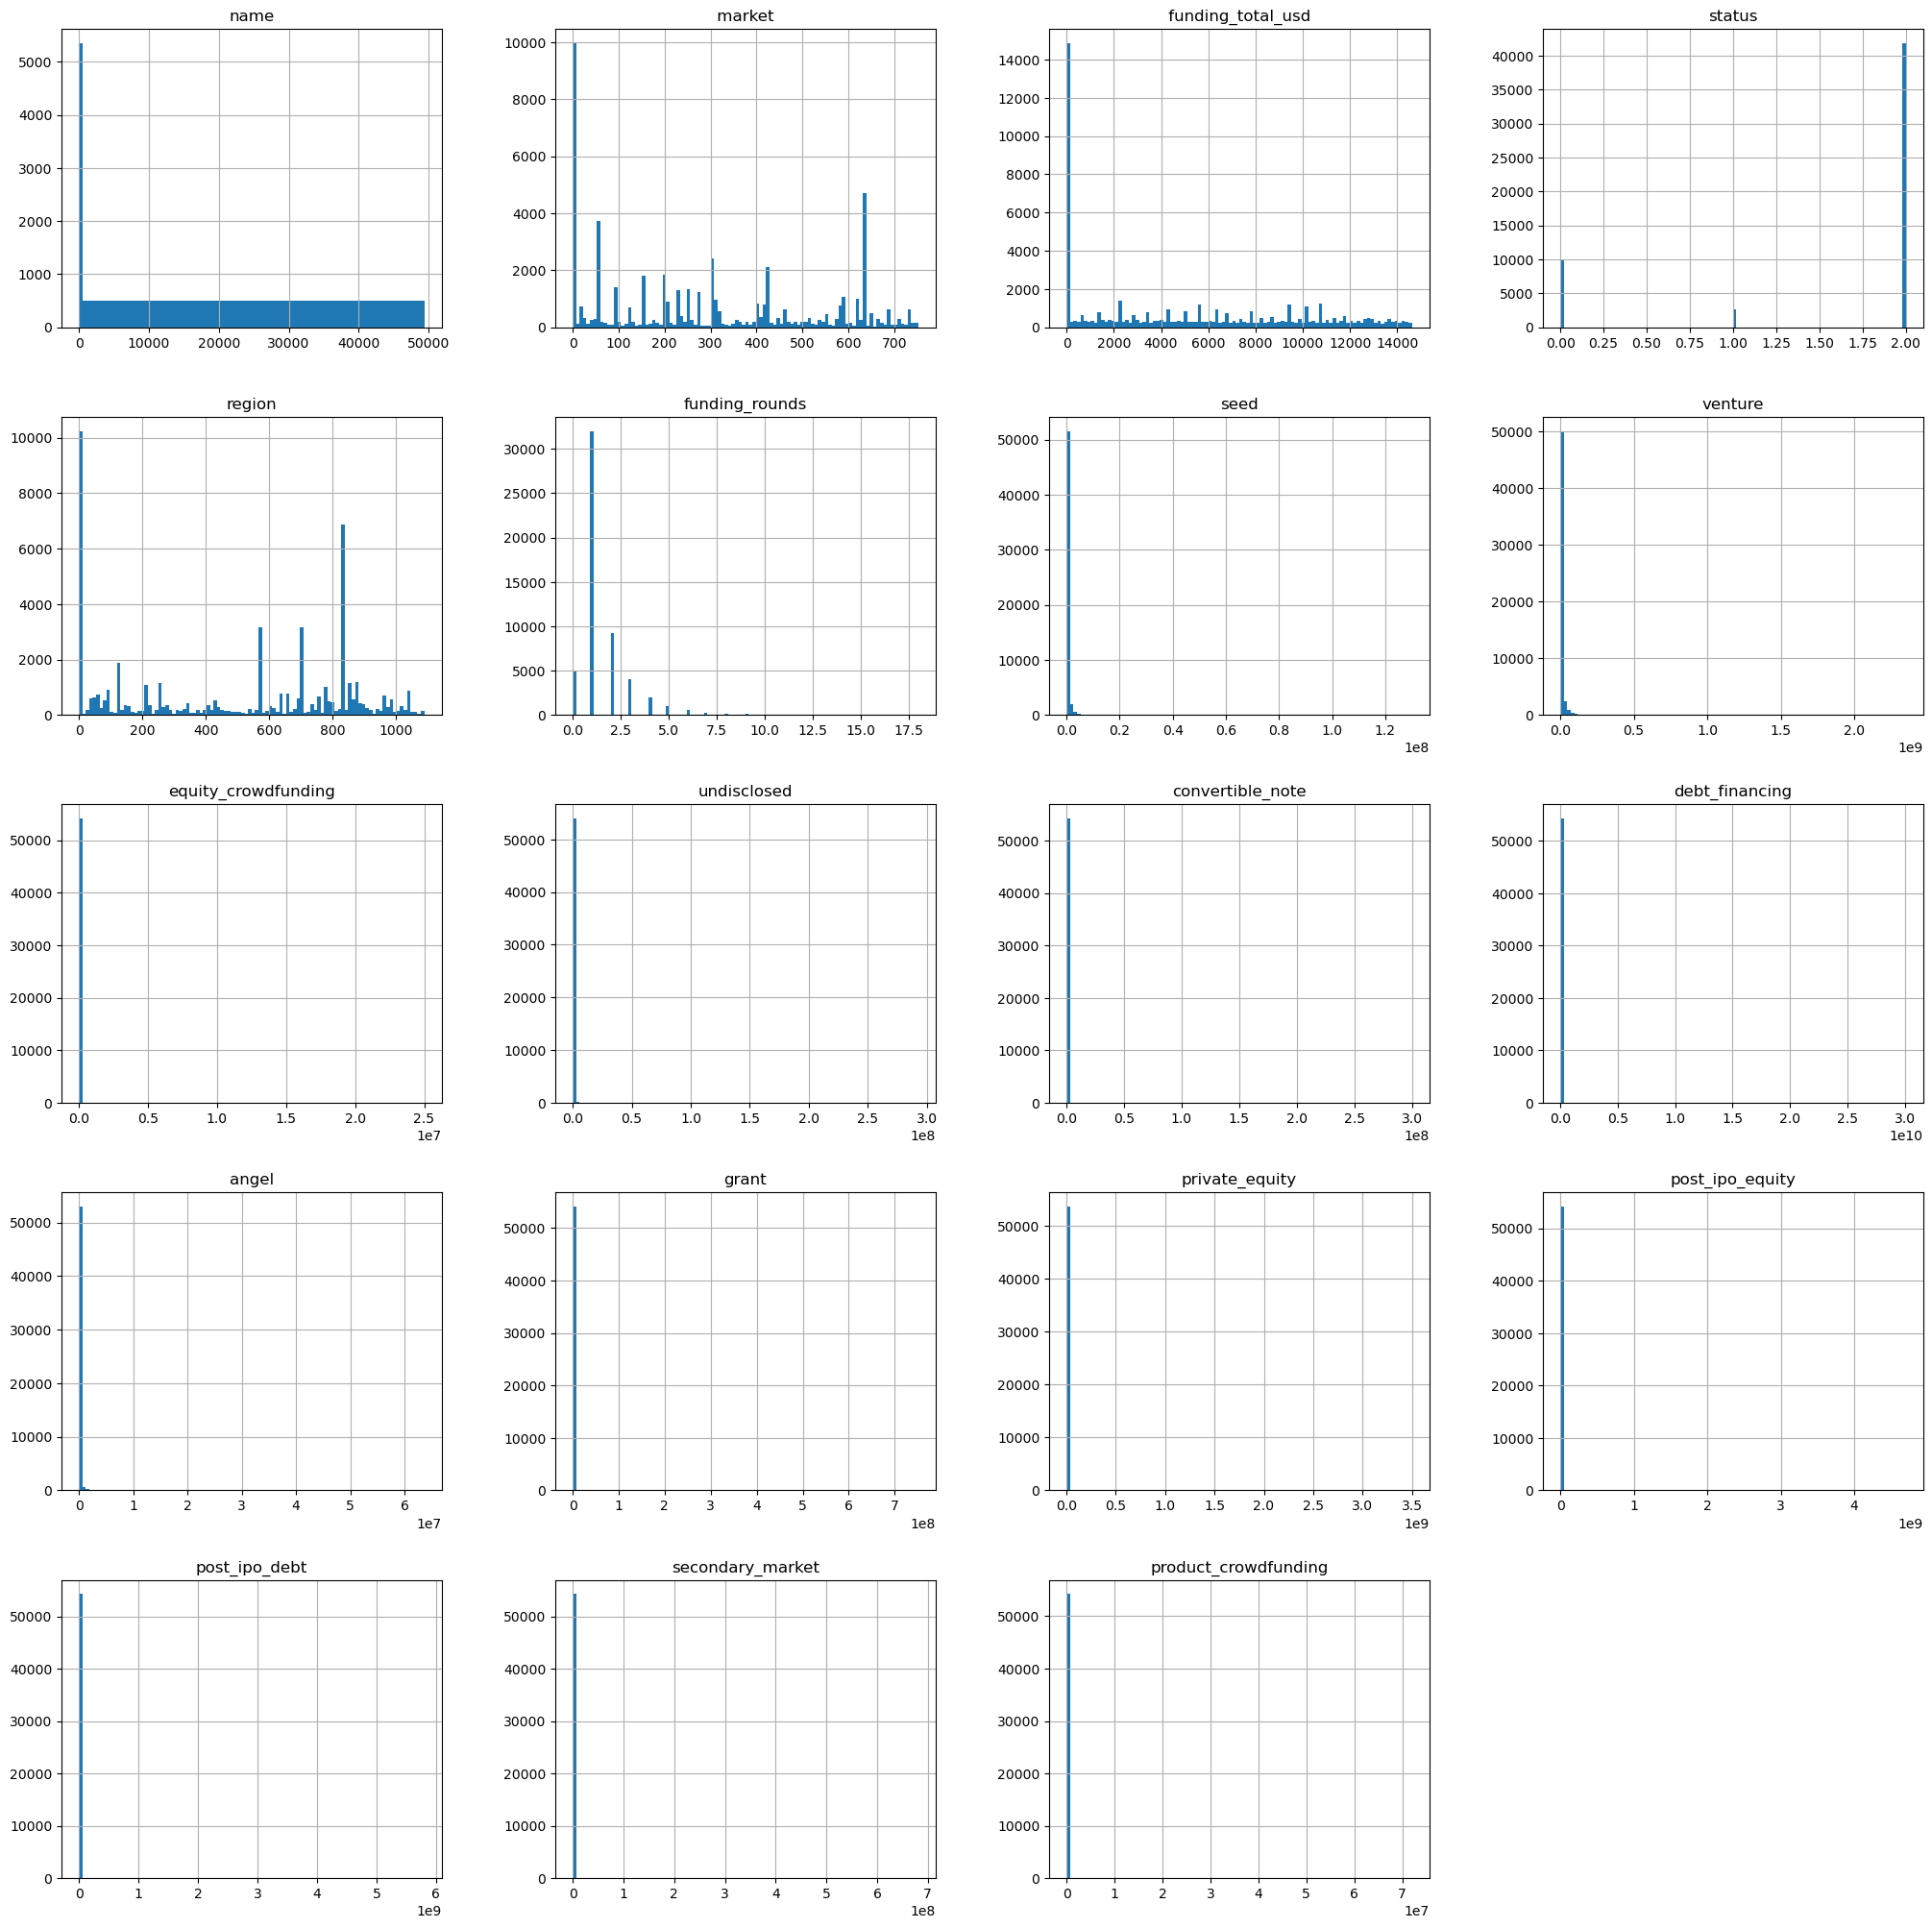

In [24]:
# =======================================================================================================
# Plotting Histograms to visualize the data distribution:
# =======================================================================================================

ax = df.hist(figsize=(25,25), bins=100)
plt.show()


# 3. Creating the first Classifier (Naive Bayes)

In [25]:
# =======================================================================================================
# Copy DataFrame:
# =======================================================================================================


df_nb = df.copy(deep=True)


# Balance the data.
data_class_0   = df_nb[df_nb['status'] == 0]
data_class_1   = df_nb[df_nb['status'] == 1]
data_class_2   = df_nb[df_nb['status'] == 2]

min_size = len(data_class_0)

data_class_1_upsampled   = resample(data_class_1, replace=True, n_samples=min_size, random_state=1)
data_class_2_downsampled = resample(data_class_2, replace=False, n_samples=min_size, random_state=1)
balanced_data = pd.concat([data_class_0, data_class_1_upsampled, data_class_2_downsampled])

X_balanced = balanced_data.copy(deep=True)
y_balanced = X_balanced.pop('status')

#y=df_nb.pop("status")
#X_enc=df_nb

y=y_balanced
X_enc=X_balanced

x_train, x_test,y_train, y_test = train_test_split(X_enc,y,random_state=0,test_size=0.3,train_size=0.7, shuffle=True, stratify=y)


In [26]:
model = nb.BernoulliNB(alpha=0.0035564803062231283) # set alpha to good value; default=1.0 is not working great. (if you want to try..)
model.fit(x_train, y_train) 

BernoulliNB(alpha=0.0035564803062231283)

In [27]:
model.score(x_test,y_test)

0.5273771969355565

In [28]:
y_pred=model.predict(x_test)

In [29]:
fail = y_test[y_test!=y_pred] 
print(fail.head(3))
print("\ntotal mispredictions: "+str(fail.shape[0]))
#print(fail.replace({0:"aquired",1:"closed",2:"operating"}).value_counts()) 
print(fail.value_counts()) 

39285    2.0
42470    0.0
25510    2.0
Name: status, dtype: float64

total mispredictions: 4195
status
2.0    2326
0.0    1420
1.0     449
Name: count, dtype: int64


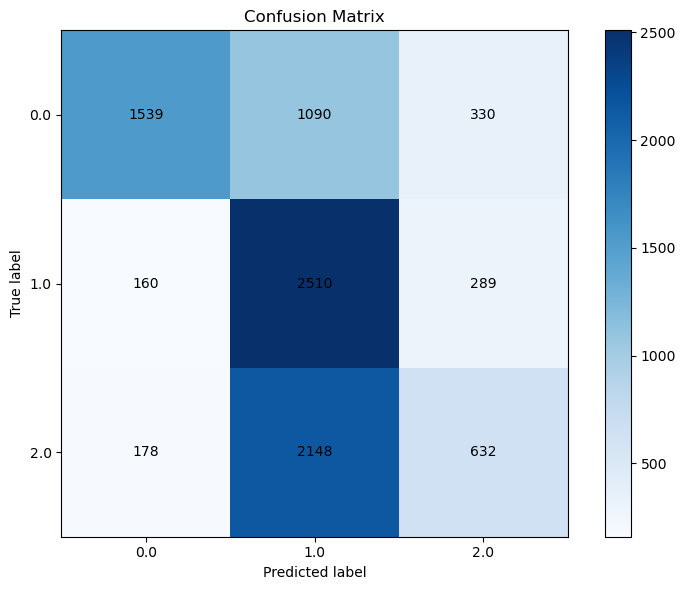

In [30]:

cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.imshow(cm, interpolation='nearest', cmap='Blues')
fig.colorbar(cax)

classes = np.unique(y_test)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=classes, yticklabels=classes,
       title='Confusion Matrix',
       ylabel='True label',
       xlabel='Predicted label')

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, cm[i, j],
                ha="center", va="center", color="black")

plt.tight_layout()
plt.show()

# 4. Creating the second Classifier (Decision Trees)

In [67]:
# =======================================================================================================
# Copy DataFrame:
# =======================================================================================================

df_dt = df.copy(deep=True)
df_dt.head()


,name,market,funding_total_usd,status,region,funding_rounds,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding
0,0.0,465.0,3978.0,0.0,699.0,1.0,1750000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,277.0,9441.0,2.0,570.0,2.0,0.0,4000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,543.0,9446.0,2.0,956.0,1.0,40000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,211.0,3482.0,2.0,568.0,1.0,1500000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.0,683.0,11816.0,2.0,251.0,2.0,0.0,0.0,60000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [68]:
# =======================================================================================================
# Create training and test splits:
# =======================================================================================================

# Create X (feature set) and y (target variable).
X_dt = df_dt.copy(deep=True)
y_dt = X_dt.pop('status')

# Balance the data.
data_class_0   = df_dt[df_dt['status'] == 0]
data_class_1   = df_dt[df_dt['status'] == 1]
data_class_2   = df_dt[df_dt['status'] == 2]

min_size = len(data_class_0)

data_class_1_upsampled   = resample(data_class_1, replace=True, n_samples=min_size, random_state=1)
data_class_2_downsampled = resample(data_class_2, replace=False, n_samples=min_size, random_state=1)
balanced_data = pd.concat([data_class_0, data_class_1_upsampled, data_class_2_downsampled])

X_balanced = balanced_data.copy(deep=True)
y_balanced = X_balanced.pop('status')

# Create Train and Test splits.
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X_balanced, y_balanced, test_size=0.20, stratify=y_balanced, random_state=1)

In [69]:
# =======================================================================================================
# Train with Prunning, max_depth = 3
# =======================================================================================================
dt_clf = DecisionTreeClassifier(criterion='gini', random_state=1, max_depth=5)
dt_clf.fit(X_train_dt, y_train_dt)

DecisionTreeClassifier(max_depth=5, random_state=1)

In [70]:
# =======================================================================================================
# Test
# =======================================================================================================
y_pred_dt = dt_clf.predict(X_test_dt)
dt_accuracy = accuracy_score(y_test_dt, y_pred_dt)
print(f"Accuracy after pruning: {dt_accuracy:.5f}")

Accuracy after pruning: 0.54393


In [72]:
imp = dt_clf.feature_importances_
feature_imp = pd.DataFrame({
    'Feature': X_train_dt.columns,
    'Importance': imp
    }).sort_values(by='Importance', ascending=False)

print(feature_imp)

                 Feature  Importance
4         funding_rounds    0.850114
1                market     0.057604
6                venture    0.049181
3                 region    0.019445
5                   seed    0.015821
12                 grant    0.005525
13        private_equity    0.002310
0                   name    0.000000
16      secondary_market    0.000000
15         post_ipo_debt    0.000000
14       post_ipo_equity    0.000000
9       convertible_note    0.000000
11                 angel    0.000000
10        debt_financing    0.000000
8            undisclosed    0.000000
7    equity_crowdfunding    0.000000
2     funding_total_usd     0.000000
17  product_crowdfunding    0.000000


# 5. Creating the third Classifier (Random Forest)

In [71]:
# =======================================================================================================
# Copy DataFrame:
# =======================================================================================================

df_rf = df.copy(deep=True)
df_rf.head()


,name,market,funding_total_usd,status,region,funding_rounds,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding
0,0.0,465.0,3978.0,0.0,699.0,1.0,1750000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,277.0,9441.0,2.0,570.0,2.0,0.0,4000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,543.0,9446.0,2.0,956.0,1.0,40000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,211.0,3482.0,2.0,568.0,1.0,1500000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.0,683.0,11816.0,2.0,251.0,2.0,0.0,0.0,60000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 6. Creating the fourth Classifier (ANN)

In [15]:
# =======================================================================================================
# Copy DataFrame:
# =======================================================================================================

df_nn = df.copy(deep=True)
df_nn.head()


,name,market,funding_total_usd,status,region,funding_rounds,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding
0,0.0,465.0,3978.0,0.0,699.0,1.0,1750000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,277.0,9441.0,2.0,570.0,2.0,0.0,4000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,543.0,9446.0,2.0,956.0,1.0,40000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,211.0,3482.0,2.0,568.0,1.0,1500000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.0,683.0,11816.0,2.0,251.0,2.0,0.0,0.0,60000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
# =======================================================================================================
# Device check:
# =======================================================================================================

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using {device} for training the network')


Using cpu for training the network


In [17]:
# =======================================================================================================
# Create training and test splits:
# =======================================================================================================

# Create X (feature set) and y (target variable).
X_nn = df_nn.copy(deep=True)
y_nn = X_nn.pop('status')

# Balance the data.
data_class_0   = df_nn[df_nn['status'] == 0]
data_class_1   = df_nn[df_nn['status'] == 1]
data_class_2   = df_nn[df_nn['status'] == 2]

min_size = len(data_class_0)

data_class_1_upsampled   = resample(data_class_1, replace=True, n_samples=min_size, random_state=1)
data_class_2_downsampled = resample(data_class_2, replace=False, n_samples=min_size, random_state=1)
balanced_data = pd.concat([data_class_0, data_class_1_upsampled, data_class_2_downsampled])

X_balanced = balanced_data.copy(deep=True)
y_balanced = X_balanced.pop('status')

# Create Train and Test splits.
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X_balanced, y_balanced, test_size=0.20, stratify=y_balanced, random_state=1)

# Converting values for usage with skorch.
X_train_np = X_train_nn.astype(np.float32).values
X_test_np  = X_test_nn.astype(np.float32).values 
y_train_np = y_train_nn.astype(np.int64).values
y_test_np  = y_test_nn.astype(np.int64).values

print('Sample distribution:')
print(f'Train: \t {len(y_train_nn)}')
print(f'Test: \t {len(y_test_nn)}')
print()
print('Class distribution:')
print(f'Aquired: \t {y_train_nn[y_train_nn==0].count()}')
print(f'Closed: \t {y_train_nn[y_train_nn==1].count()}')
print(f'Operating: \t {y_train_nn[y_train_nn==2].count()}')


Sample distribution:
Train: 	 23668
Test: 	 5918

Class distribution:
Aquired: 	 7890
Closed: 	 7889
Operating: 	 7889


In [18]:
# =======================================================================================================
# Create the Neural Network structure:
# =======================================================================================================

class NeuralNetwork(nn.Module):
    def __init__(self, num_features, num_classes):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(num_features, 144),      # Input Layer -> 18 inputs (=DataFrame columns) -> 128 Outputs to next layer.
            nn.Sigmoid(),
            
            nn.Linear(144, 36),                # Hidden Layer -> 128 inputs -> 32 outputs to next layer.
            nn.Sigmoid(),

            nn.Linear(36, 18),                 # Hidden Layer -> 32 inputs -> 16 outputs to next layer.
            nn.Sigmoid(),
            
            nn.Linear(18, num_classes)         # Output Layer -> 16 inputs -> 3 outputs (Amount of target classes)
        )
        
    def forward(self, X, **kwargs):
        return self.model(X)


In [19]:
# =======================================================================================================
# Create results DataFrame:
# =======================================================================================================

results = pd.DataFrame.from_records([], columns=['optimizer','batch_size','learningRate','time','epochs','acc_train','acc_test'])
results


,optimizer,batch_size,learningRate,time,epochs,acc_train,acc_test


In [20]:
# =======================================================================================================
# Create lists to hold different classifiers, classifier results and their parameters.
# =======================================================================================================

classifier_list = []
pred_test_results_list = []
model_params = []


In [21]:
# =======================================================================================================
# Create a custom scorer to work with skorch:
# =======================================================================================================

def custom_accuracy(y_true, y_pred):
    y_pred = np.argmax(y_pred, axis=1)
    return accuracy_score(y_true, y_pred)

skorch_accuracy_scorer = make_scorer(custom_accuracy, greater_is_better=True)


In [22]:
# =======================================================================================================
# Hyperparameter tuning: 
# =======================================================================================================

ITERATIONS = 5    # (DEPENDING ON THIS THE TUNING IS GOING TO TAKE LONG! -> as reference: ~5-10 min on RTX 3080ti for 1 ITERATION)

distributions = {
    'lr':         uniform(0.00000001, 0.1),
    'max_epochs': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200],
    'optimizer':  [torch.optim.Adam, torch.optim.AdamW, torch.optim.SGD, torch.optim.RMSprop, torch.optim.Adagrad],
    'batch_size': [512, 1024, 2048, 4096, 8192],
}

# Create a Skorch Model using the PyTorch Neural Network structure as module.
model = NeuralNet(
    module=NeuralNetwork,
    module__num_features=18,
    module__num_classes=3,
    criterion=nn.CrossEntropyLoss(),
    verbose=False,
    device=device
)

for i in range(ITERATIONS):

    # Using RandomizedSearchCV to find good hyperparameters.
    random_search = RandomizedSearchCV(model, distributions, scoring=skorch_accuracy_scorer, cv=4, random_state=i)
    search = random_search.fit(X_train_np, y_train_np)
    print(f'Best parameters from search event: \n')
    print(f'{search.best_params_} \n')

    # Append params to model_params list.
    model_params.append(search.best_params_)
    
    # Training new Classifier with those results
    mlp_tuned = NeuralNet(
                    module=NeuralNetwork,
                    module__num_features=18,
                    module__num_classes=3,
                    criterion=nn.CrossEntropyLoss(),
                    **search.best_params_,
                    verbose=False,
                    device=device
    )

    # Start time measurement.
    start_time = dt.datetime.now()

    # Perform the learning
    mlp_tuned.fit(X_test_np, y_test_np)

    # Stop time measurement.
    end_time = dt.datetime.now()

    # Calculate the time delta and format it.
    training_time = str(end_time - start_time)[:7]

    # Predict Train and Test results.
    pred_train_mlp_tuned = mlp_tuned.predict(X_train_np)
    pred_train_mlp_tuned = np.argmax(pred_train_mlp_tuned, axis=1)
    pred_test_mlp_tuned = mlp_tuned.predict(X_test_np)
    pred_test_mlp_tuned = np.argmax(pred_test_mlp_tuned, axis=1)

    train_result = accuracy_score(pred_train_mlp_tuned, y_train_np)
    test_result = accuracy_score(pred_test_mlp_tuned, y_test_np)
    
    # Printing results.
    print(f'Training Accuracy: {train_result}')
    print(f'Testinng Accuracy: {test_result}')
    print()
    
    # Add classifier and test predictions to lists.
    classifier_list.append(mlp_tuned)
    pred_test_results_list.append(pred_test_mlp_tuned)
    
    # Create DataFrame entry
    entry = pd.DataFrame({
        'optimizer': [type(mlp_tuned.optimizer_).__name__],
        'batch_size': [mlp_tuned.batch_size],
        'learningRate': [mlp_tuned.optimizer_.param_groups[0]['lr']],
        'time': [training_time],
        'epochs': [mlp_tuned.max_epochs],
        'acc_train': [train_result], 
        'acc_test': [test_result]
    })

    # Add entry to results
    results = pd.concat([results, entry], ignore_index=True)

results


Best parameters from search event: 

{'batch_size': 2048, 'lr': np.float64(0.043758731126269254), 'max_epochs': 70, 'optimizer': <class 'torch.optim.adam.Adam'>} 

Training Accuracy: 0.5247591684975494
Testinng Accuracy: 0.5368367691787767



C:\Users\DL4CV-USER\AppData\Local\Temp\ipykernel_1180\1543396079.py:88: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, entry], ignore_index=True)


Best parameters from search event: 

{'batch_size': 8192, 'lr': np.float64(0.020445234973151746), 'max_epochs': 110, 'optimizer': <class 'torch.optim.adagrad.Adagrad'>} 

Training Accuracy: 0.5193932736183877
Testinng Accuracy: 0.5278810408921933

Best parameters from search event: 

{'batch_size': 2048, 'lr': np.float64(0.012716007170127747), 'max_epochs': 150, 'optimizer': <class 'torch.optim.adagrad.Adagrad'>} 

Training Accuracy: 0.5217593375021126
Testinng Accuracy: 0.5260223048327137

Best parameters from search event: 

{'batch_size': 8192, 'lr': np.float64(0.022195798393218145), 'max_epochs': 150, 'optimizer': <class 'torch.optim.adagrad.Adagrad'>} 

Training Accuracy: 0.5253084333276998
Testinng Accuracy: 0.5371747211895911

Best parameters from search event: 

{'batch_size': 2048, 'lr': np.float64(0.014146427361702357), 'max_epochs': 140, 'optimizer': <class 'torch.optim.adamw.AdamW'>} 

Training Accuracy: 0.5206608078418117
Testinng Accuracy: 0.5498479215951335



,optimizer,batch_size,learningRate,time,epochs,acc_train,acc_test
0,Adam,2048,0.043759,0:00:03,70,0.524759,0.536837
1,Adagrad,8192,0.020445,0:00:04,110,0.519393,0.527881
2,Adagrad,2048,0.012716,0:00:06,150,0.521759,0.526022
3,Adagrad,8192,0.022196,0:00:06,150,0.525308,0.537175
4,AdamW,2048,0.014146,0:00:06,140,0.520661,0.549848


In [23]:
# ======================================================================================================= 
# Get the best performing classifier from the results list:
# =======================================================================================================

best_classifier_index = results['acc_test'].idxmax()

best_model = classifier_list[best_classifier_index]
y_test_pred = pred_test_results_list[best_classifier_index]


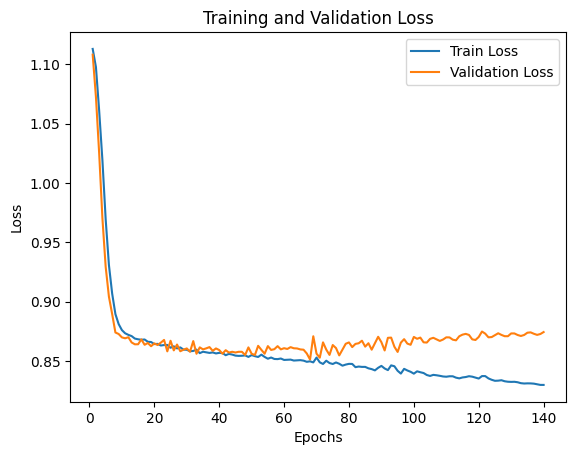

In [24]:
# =======================================================================================================
# Plot loss and accuracy:
# =======================================================================================================

history = best_model.history

plt.plot(history[:, 'epoch'], history[:, 'train_loss'], label='Train Loss')
plt.plot(history[:, 'epoch'], history[:, 'valid_loss'], label='Validation Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.title('Training and Validation Loss')
plt.legend()
plt.show()


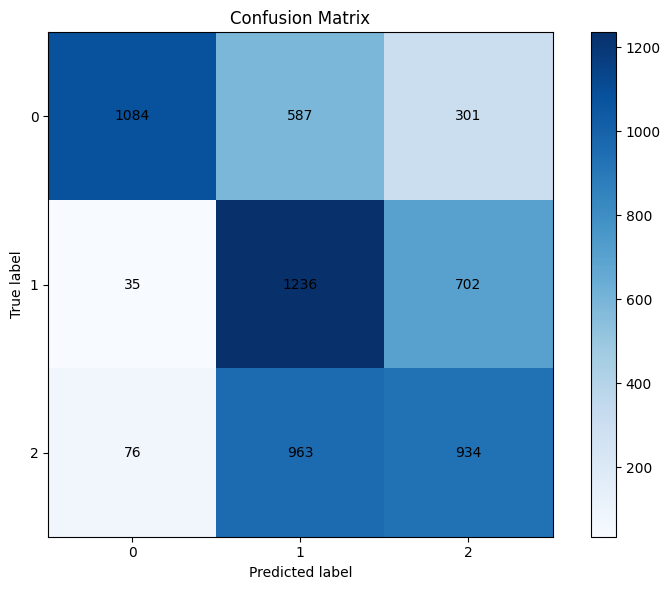

In [25]:
# =======================================================================================================
# Plot confusion matrix:
# =======================================================================================================

cm = confusion_matrix(y_test_np, y_test_pred)

fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.imshow(cm, interpolation='nearest', cmap='Blues')
fig.colorbar(cax)

classes = np.unique(y_test_np)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=classes, yticklabels=classes,
       title='Confusion Matrix',
       ylabel='True label',
       xlabel='Predicted label')

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, cm[i, j],
                ha="center", va="center", color="black")

plt.tight_layout()
plt.show()


In [26]:
# =======================================================================================================
# Print Classification Report:
# =======================================================================================================

print(classification_report(y_test_np, y_test_pred, zero_division=0))


              precision    recall  f1-score   support

           0       0.91      0.55      0.68      1972
           1       0.44      0.63      0.52      1973
           2       0.48      0.47      0.48      1973

    accuracy                           0.55      5918
   macro avg       0.61      0.55      0.56      5918
weighted avg       0.61      0.55      0.56      5918



# 7. Conclusion